In [5]:
import numpy as np
import pandas as pd
import glacierml as gl
import matplotlib.pyplot as plt
import scipy.stats as st

# pd.set_option('display.max_column',None)

#### Let's take a look at the variances we calculated in vol_confidence_interval.ipynb

In [7]:
cols = []
for i in range(273):
    cols.append(i)
df = pd.read_pickle('final.pkl')
# df = pd.read_pickle('/data/fast1/glacierml/data/final_df.pkl')
E_H = np.mean(df[cols],axis = 1)
E_A = df['Area']
var_eps_H = df['var_eps_H']
var_eps_R = df['var_eps_R']
var_eps_M = df['var_eps_M']
var_H = df['var_H']
var_A = df['var_A']
v1 = (var_H * var_A)
v2 = (var_H * E_A**2) 
v3 = (E_H**2 * var_A)
sigma_k_ind = v1 + v2 + v3 

In [8]:
df

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,270,271,272,FMT,var_eps_H,var_eps_R,var_eps_M,var_H,var_A,sig_k_ind
0,RGI60-01.00001,G213177E63689N,20090703,-9999999,-146.8230,63.6890,1,2,0.360,1936,...,0.012,0.010,0.012,19.988910,0.000005,0.000005,0.000004,0.000013,0.003275,2.166991e-06
1,RGI60-01.00002,G213332E63404N,20090703,-9999999,-146.6680,63.4040,1,2,0.558,1713,...,0.040,0.035,0.034,29.413269,0.000008,0.000026,0.000026,0.000060,0.006049,2.801301e-05
2,RGI60-01.00003,G213920E63376N,20090703,-9999999,-146.0800,63.3760,1,2,1.685,1609,...,0.039,0.033,0.032,31.862368,0.000009,0.000025,0.000026,0.000060,0.028419,2.113503e-04
3,RGI60-01.00004,G213880E63381N,20090703,-9999999,-146.1200,63.3810,1,2,3.681,1273,...,0.041,0.039,0.035,45.454704,0.000010,0.000030,0.000031,0.000071,0.084864,1.121075e-03
4,RGI60-01.00005,G212943E63551N,20090703,-9999999,-147.0570,63.5510,1,2,2.573,1494,...,0.042,0.039,0.036,43.040817,0.000011,0.000031,0.000032,0.000073,0.051403,5.860300e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216496,RGI60-19.02748,G322268E53986S,20020502,-9999999,-37.7325,-53.9860,19,3,0.042,310,...,0.049,0.037,0.038,12.593311,0.000028,0.000030,0.000032,0.000090,0.000162,4.730353e-07
216497,RGI60-19.02749,G323864E54831S,20030207,-9999999,-36.1361,-54.8310,19,3,0.567,330,...,0.056,0.049,0.049,20.532068,0.000024,0.000041,0.000044,0.000109,0.006186,5.307434e-05
216498,RGI60-19.02750,G322698E54188S,20030207,-9999999,-37.3018,-54.1884,19,3,4.118,10,...,0.075,0.071,0.071,55.923466,0.000042,0.000071,0.000084,0.000196,0.099296,3.965591e-03
216499,RGI60-19.02751,G269573E68866S,19870101,-9999999,-90.4266,-68.8656,19,1,0.011,170,...,0.093,0.095,0.092,10.181019,0.000032,0.000089,0.000108,0.000229,0.000025,2.443060e-07


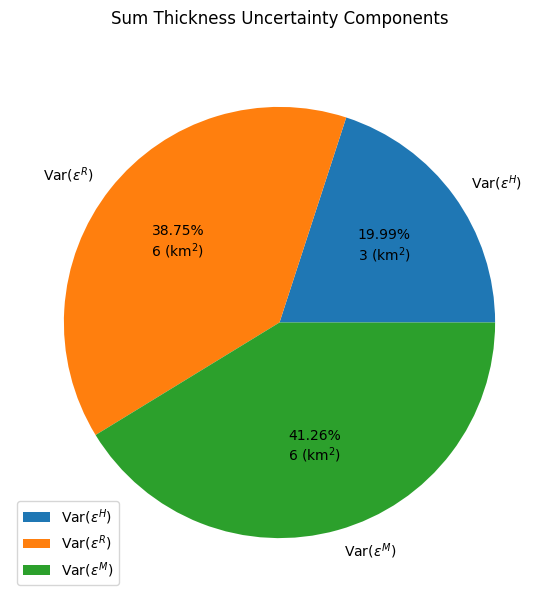

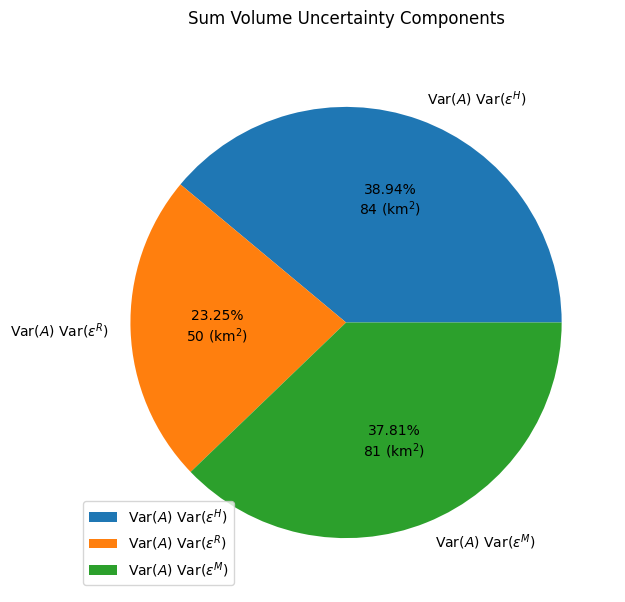

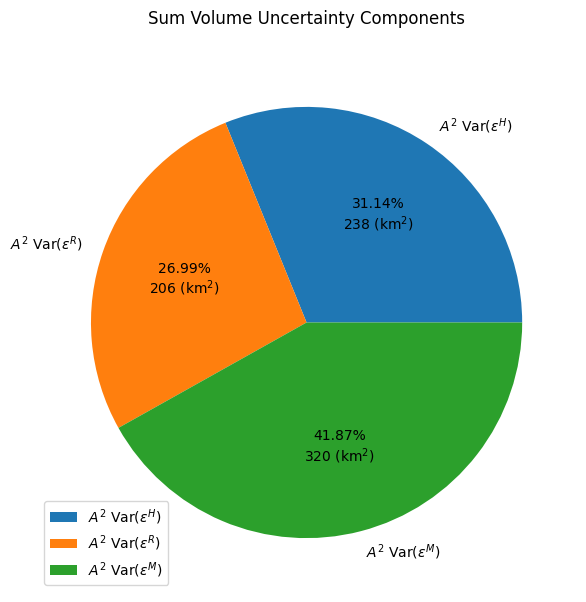

In [10]:

data = [[r'Var$\left(\epsilon^H\right)$', (np.sum(df['var_eps_H']))], 
        [r'Var$\left(\epsilon^R\right)$', (np.sum(df['var_eps_R']))], 
        [r'Var$\left(\epsilon^M\right)$', (np.sum(df['var_eps_M']))]]
data = pd.DataFrame(data, columns=['Name', 'Contribution to Var($H$)'], index=[
    r'Var$\left(\epsilon^H\right)$',
    r'Var$\left(\epsilon^R\right)$',
    r'Var$\left(\epsilon^M\right)$',
])

fig, ax = plt.subplots(figsize=(10, 7))

mu = np.round(np.sum(np.mean(df[cols]*1e3,axis = 1)),0)
unc = np.sqrt(np.sum(var_H)) / mu * 100
tit =( 
   
    f'Sum Thickness Uncertainty Components\n'

)
# Plotting the pie chart
pie = data.plot.pie(
    y='Contribution to Var($H$)',
    autopct=lambda p: '{:.2f}%\n{:.0f} (km$^2$)'.
    format(p, p * sum(data['Contribution to Var($H$)']) / 100),
    ax=ax,
    title=tit
)
ax.set_ylabel('')
plt.legend(loc = 'lower left')
plt.show()


data = [[r'Var$\left(\epsilon^H\right)$', (np.sum(df['var_A'] * df['var_eps_H']))], 
        [r'Var$\left(\epsilon^R\right)$', (np.sum(df['var_A'] * df['var_eps_R']))], 
        [r'Var$\left(\epsilon^M\right)$', (np.sum(df['var_A'] * df['var_eps_M']))]]
data = pd.DataFrame(data, columns=['Name', 'Contribution to Var($H$)'], index=[
    r'Var$\left(A\right)$ Var$\left(\epsilon^H\right)$',
    r'Var$\left(A\right)$ Var$\left(\epsilon^R\right)$',
    r'Var$\left(A\right)$ Var$\left(\epsilon^M\right)$',
])

fig, ax = plt.subplots(figsize=(10, 7))

mu = np.round(np.sum(np.mean(df[cols]*1e3,axis = 1)),0)
unc = np.sqrt(np.sum(var_H)) / mu * 100
tit =( 
   
    f'Sum Volume Uncertainty Components\n'

)
# Plotting the pie chart
pie = data.plot.pie(
    y='Contribution to Var($H$)',
    autopct=lambda p: '{:.2f}%\n{:.0f} (km$^2$)'.
    format(p, p * sum(data['Contribution to Var($H$)']) / 100),
    ax=ax,
    title=tit
)
ax.set_ylabel('')
plt.legend(loc = 'lower left')
plt.show()


data = [[r'Var$\left(\epsilon^H\right)$', (np.sum(df['Area'] * df['var_eps_H']))], 
        [r'Var$\left(\epsilon^R\right)$', (np.sum(df['Area'] * df['var_eps_R']))], 
        [r'Var$\left(\epsilon^M\right)$', (np.sum(df['Area'] * df['var_eps_M']))]]
data = pd.DataFrame(data, columns=['Name', 'Contribution to Var($H$)'], index=[
    r'$A^2$ Var$\left(\epsilon^H\right)$',
    r'$A^2$ Var$\left(\epsilon^R\right)$',
    r'$A^2$ Var$\left(\epsilon^M\right)$',
])

fig, ax = plt.subplots(figsize=(10, 7))

mu = np.round(np.sum(np.mean(df[cols]*1e3,axis = 1)),0)
unc = np.sqrt(np.sum(var_H)) / mu * 100
tit =( 
   
    f'Sum Volume Uncertainty Components\n'
)
pie = data.plot.pie(
    y='Contribution to Var($H$)',
    autopct=lambda p: '{:.2f}%\n{:.0f} (km$^2$)'.
    format(p, p * sum(data['Contribution to Var($H$)']) / 100),
    ax=ax,
    title=tit
)


ax.set_ylabel('')

plt.legend(loc = 'lower left')
plt.show()

In [11]:
data

,Name,Contribution to Var($H$)
$A^2$ Var$\left(\epsilon^H\right)$,Var$\left(\epsilon^H\right)$,237.828287
$A^2$ Var$\left(\epsilon^R\right)$,Var$\left(\epsilon^R\right)$,206.081325
$A^2$ Var$\left(\epsilon^M\right)$,Var$\left(\epsilon^M\right)$,319.755524


NameError: name 'total_sum_A' is not defined

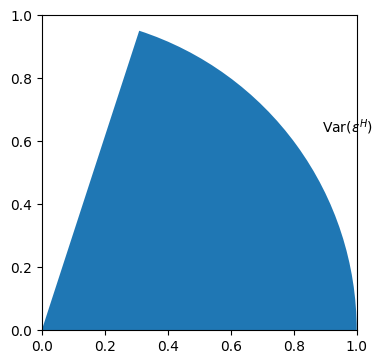

In [12]:
data_A = [[r'Var$\left(\epsilon^H\right)$', (np.sum(df['var_eps_H']))], 
        [r'Var$\left(\epsilon^R\right)$', (np.sum(df['var_eps_R']))], 
        [r'Var$\left(\epsilon^M\right)$', (np.sum(df['var_eps_M']))]]
data_A = pd.DataFrame(data_A, columns=['Name', 'Contribution to Var($H$)'], index=[
    r'Var$\left(\epsilon^H\right)$',
    r'Var$\left(\epsilon^R\right)$',
    r'Var$\left(\epsilon^M\right)$',
])

# Define B data
data_B = [[r'Var$\left(\epsilon^H\right)$', (np.sum(df['var_A'] * df['var_eps_H']))], 
        [r'Var$\left(\epsilon^R\right)$', (np.sum(df['var_A'] * df['var_eps_R']))], 
        [r'Var$\left(\epsilon^M\right)$', (np.sum(df['var_A'] * df['var_eps_M']))]]
data_B = pd.DataFrame(data_B, columns=['Name', 'Contribution to Var($H$)'], index=[
    r'Var$\left(A\right)$ Var$\left(\epsilon^H\right)$',
    r'Var$\left(A\right)$ Var$\left(\epsilon^R\right)$',
    r'Var$\left(A\right)$ Var$\left(\epsilon^M\right)$',
])

# Define C data
data_C = [[r'Var$\left(\epsilon^H\right)$', (np.sum(df['Area'] * df['var_eps_H']))], 
        [r'Var$\left(\epsilon^R\right)$', (np.sum(df['Area'] * df['var_eps_R']))], 
        [r'Var$\left(\epsilon^M\right)$', (np.sum(df['Area'] * df['var_eps_M']))]]
data_C = pd.DataFrame(data_C, columns=['Name', 'Contribution to Var($H$)'], index=[
    r'$A^2$ Var$\left(\epsilon^H\right)$',
    r'$A^2$ Var$\left(\epsilon^R\right)$',
    r'$A^2$ Var$\left(\epsilon^M\right)$',
])

# Calculate the maximum sum of contributions across all datasets
max_sum = max(data_A['Contribution to Var($H$)'].sum(),
              data_B['Contribution to Var($H$)'].sum(),
              data_C['Contribution to Var($H$)'].sum())

# Plot function with fixed size for the pie charts

# Create subplots using gridspec
fig = plt.figure(figsize=(9,9))
gs = fig.add_gridspec(2, 2)

# Plot data_A
ax1 = fig.add_subplot(gs[0, 0])
ax1.pie(
    data_A['Contribution to Var($H$)'], 
    labels=data_A.index, 
    autopct=lambda p: '{:.2f}%\n{:.0f} (km$^2$)'.format(p, p * total_sum_A / 100),
    startangle=0
)
ax1.text(0.5, 1, 'A', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

# ax1.set_title('Data A')

# Plot data_B
ax2 = fig.add_subplot(gs[0, 1])
ax2.pie(
    data_B['Contribution to Var($H$)'], 
    labels=data_B.index, 
    autopct=lambda p: '{:.2f}%\n{:.0f} (km$^2$)'.format(p, p * total_sum_B / 100),
    startangle=0
)
ax2.text(0.53, 1, 'B', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

# ax2.set_title('Data B')

# Center plot for data_C
ax3 = fig.add_subplot(gs[1, :])
ax3.pie(
    data_C['Contribution to Var($H$)'], 
    labels=data_C.index,
    autopct=lambda p: '{:.2f}%\n{:.0f} (km$^2$)'.format(p, p * total_sum_C / 100),
    startangle=0
)
ax3.text(0.5, 1, 'C', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

# ax3.set_title('Data C')

# Hide the empty subplot in the first row
ax3.axis('off')

# Set equal aspect ratio for axes
for ax in [ax1, ax2, ax3]:
    ax.set(aspect='equal')

# Adjust layout
plt.tight_layout()
plt.suptitle('Global Thickness and Volume Uncertainty Components', y = 1.0,fontsize = 15)
# Show plot
plt.show()

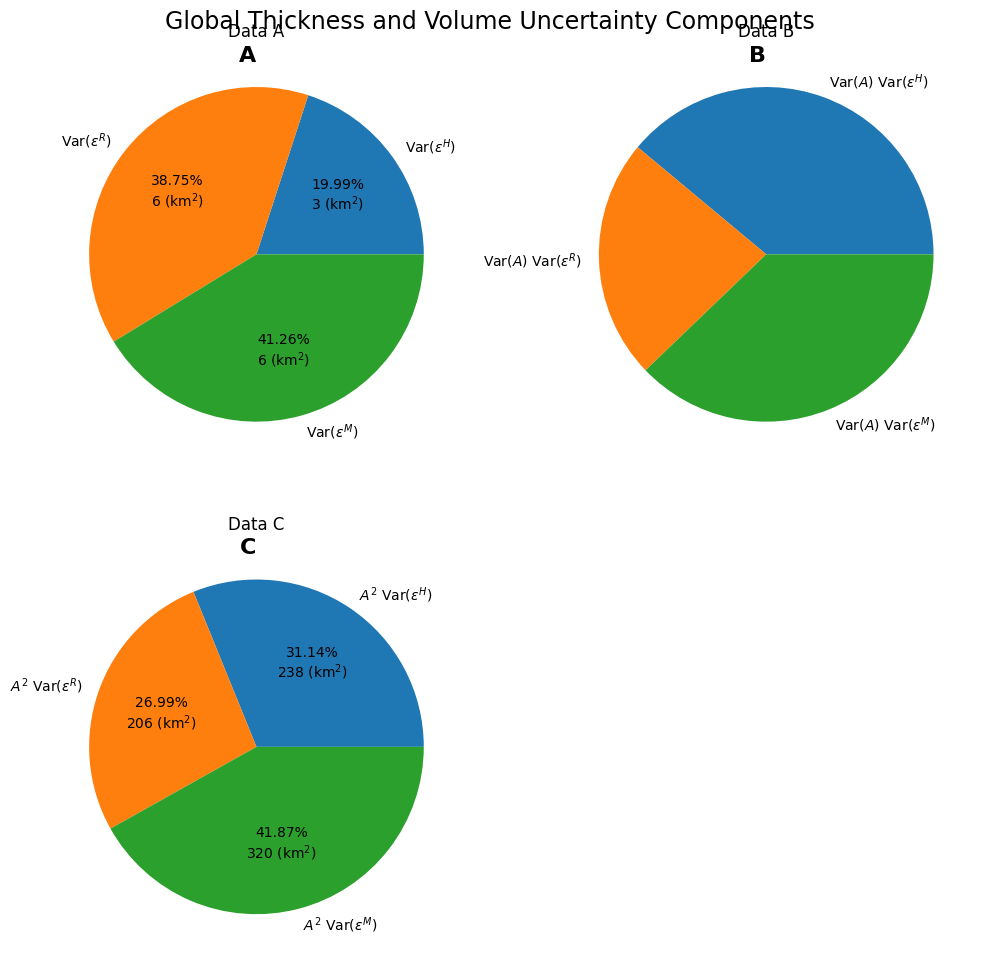

In [13]:
# Calculate the total sum
total_sum_A = data_A['Contribution to Var($H$)'].sum()
total_sum_B = data_B['Contribution to Var($H$)'].sum()
total_sum_C = data_C['Contribution to Var($H$)'].sum()

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot data_A
axs[0, 0].pie(data_A['Contribution to Var($H$)'], labels=data_A.index, autopct=lambda p: '{:.2f}%\n{:.0f} (km$^2$)'.format(p, p * total_sum_A / 100))
axs[0, 0].set_title('Data A')
axs[0, 0].text(0.5, 1, 'A', transform=axs[0, 0].transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

# Plot data_B
axs[0, 1].pie(data_B['Contribution to Var($H$)'], labels=data_B.index, 
              )
axs[0, 1].set_title('Data B')
axs[0, 1].text(0.5, 1, 'B', transform=axs[0, 1].transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

# Plot data_C
axs[1, 0].pie(data_C['Contribution to Var($H$)'], labels=data_C.index, autopct=lambda p: '{:.2f}%\n{:.0f} (km$^2$)'.format(p, p * total_sum_C / 100))
axs[1, 0].set_title('Data C')
axs[1, 0].text(0.5, 1, 'C', transform=axs[1, 0].transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

# Hide the empty subplot in the second row
axs[1, 1].axis('off')

# Set equal aspect ratio for axes
for ax in axs.flat:
    ax.set(aspect='equal')

# Adjust layout
plt.tight_layout()
plt.suptitle('Global Thickness and Volume Uncertainty Components', fontsize=17)

# Show plot
plt.show()

In [239]:
data_B

,Name,Contribution to Var($H$)
Var$\left(A\right)$ Var$\left(\epsilon^H\right)$,Var$\left(\epsilon^H\right)$,54.331434
Var$\left(A\right)$ Var$\left(\epsilon^R\right)$,Var$\left(\epsilon^R\right)$,37.850863
Var$\left(A\right)$ Var$\left(\epsilon^M\right)$,Var$\left(\epsilon^M\right)$,78.116962


In [7]:
# glacier = 'RGI60-05.10315'
# r = df[df['RGIId'] == glacier]

# var_H = (r.loc[:,'var_H'].values[0]*1e6)
# data = [[r'Var$\left(\epsilon^H\right)$', (r.loc[:,'var_eps_H'].values[0]*1e6)], 
#         [r'Var$\left(\epsilon^RV\right)$', (r.loc[:,'var_eps_R'].values[0]*1e6)], 
#         [r'Var$\left(\epsilon^M\right)$', (r.loc[:,'var_eps_M'].values[0]*1e6)]]
# #         [r'Var$\left(\epsilon^{RA}\right)$', (r.loc[:,'var_eps_RA'].values[0]*1e6)]]
# data = pd.DataFrame(data, columns=['Name', 'Contribution to Var($H$)'], index=[
#     r'Var$\left(\epsilon^H\right)$',
#     r'Var$\left(\epsilon^R\right)$',
#     r'Var$\left(\epsilon^M\right)$',
# #     r'Var$\left(\epsilon^{RA}\right)$'
# ])

# fig, ax = plt.subplots(figsize=(13, 10))

# mu = np.round((np.mean(r[cols]*1e3,axis = 1)).values[0],0)
# unc = np.sqrt(var_H) / mu * 100
# a = np.round(r['Area'],0).values[0]
# tit =( 
   
#     f'Flade Isblink {glacier}\n'
#     f'Mean Estimated Thickness = {mu} m\n'
#     rf'Surface Area $\approx {a}$ km$^2$''\n'
#     f'Var($H_k$) ={np.round(var_H,0)} m$^2$\n'
#     '\n'rf'Thickness Uncertainty$\approx {np.round(unc,2)}$%'

    
# )
# # Plotting the pie chart
# pie = data.plot.pie(
#     y='Contribution to Var($H$)',
#     autopct=lambda p: '{:.2f}%\n{:.0f} (m$^2$)'.
#     format(p, p * sum(data['Contribution to Var($H$)']) / 100),
#     ax=ax,
#     title=tit
# )


# # Removing the ylabel
# ax.set_ylabel('')

# # Adding a legend outside the plot
# plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# plt.show()

In [8]:
# glacier = 'RGI60-02.04403'
# r = df[df['RGIId'] == glacier]

# var_H = (r.loc[:,'var_H'].values[0]*1e6)
# data = [[r'Var$\left(\epsilon^H_k\right)$', (r.loc[:,'var_eps_H'].values[0]*1e6)], 
#         [r'Var$\left(\epsilon^RV_k\right)$', (r.loc[:,'var_eps_R'].values[0]*1e6)], 
#         [r'Var$\left(\epsilon^M_k\right)$', (r.loc[:,'var_eps_M'].values[0]*1e6)]]
# #         [r'Var$\left(\epsilon^{RA}_k\right)$', (r.loc[:,'var_eps_RA'].values[0]*1e6)]]
# data = pd.DataFrame(data, columns=['Name', 'Contribution to Var($H$)'], index=[
#     r'Var$\left(\epsilon^H_k\right)$',
#     r'Var$\left(\epsilon^R_k\right)$',
#     r'Var$\left(\epsilon^M_k\right)$',
# #     r'Var$\left(\epsilon^{RA}_k\right)$'
# ])
# fig, ax = plt.subplots(figsize=(13, 10))

# mu = np.round((np.mean(r[cols]*1e3,axis = 1)).values[0],0)
# unc = np.sqrt(var_H) / mu * 100
# a = np.round(r['Area'],0).values[0]
# tit =( 
   
#     f'Random Medium Glacier {glacier}\n'
#     f'Mean Estimated Thickness = {mu} m\n'
#     rf'Surface Area $\approx {a}$ km$^2$''\n'
#     f'Var($H_k$) ={np.round(var_H,0)} m$^2$\n'
#     '\n'rf'Thickness Uncertainty$\approx {np.round(unc,2)}$%'

    
# )
# # Plotting the pie chart
# pie = data.plot.pie(
#     y='Contribution to Var($H$)',
#     autopct=lambda p: '{:.2f}%\n{:.0f} (m$^2$)'.
#     format(p, p * sum(data['Contribution to Var($H$)']) / 100),
#     ax=ax,
#     title=tit
# )


# # Removing the ylabel
# ax.set_ylabel('')

# # Adding a legend outside the plot
# plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# plt.show()

In [9]:
# glacier = 'RGI60-19.02749'
# r = df[df['RGIId'] == glacier]

# var_H = (r.loc[:,'var_H'].values[0]*1e6)
# data = [[r'Var$\left(\epsilon^H\right)$', (r.loc[:,'var_eps_H'].values[0]*1e6)], 
#         [r'Var$\left(\epsilon^RV\right)$', (r.loc[:,'var_eps_R'].values[0]*1e6)], 
#         [r'Var$\left(\epsilon^M\right)$', (r.loc[:,'var_eps_M'].values[0]*1e6)]]
# #         [r'Var$\left(\epsilon^{RA}\right)$', (r.loc[:,'var_eps_RA'].values[0]*1e6)]]
# data = pd.DataFrame(data, columns=['Name', 'Contribution to Var($H$)'], index=[
#     r'Var$\left(\epsilon^H\right)$',
#     r'Var$\left(\epsilon^R\right)$',
#     r'Var$\left(\epsilon^M\right)$',
# #     r'Var$\left(\epsilon^{RA}\right)$'
# ])

# fig, ax = plt.subplots(figsize=(13, 10))

# mu = np.round((np.mean(r[cols]*1e3,axis = 1)).values[0],0)
# unc = np.sqrt(var_H) / mu * 100
# a = np.round(r['Area'],1).values[0]
# tit =( 
   
#     f'Random Small Glacier {glacier}\n'
#     f'Mean Estimated Thickness = {mu} m\n'
#     rf'Surface Area $\approx {a}$ km$^2$''\n'
#     f'Var($H$) ={np.round(var_H,0)} m$^2$\n'
#     '\n'rf'Thickness Uncertainty$\approx {np.round(unc,2)}$%'

    
# )
# # Plotting the pie chart
# pie = data.plot.pie(
#     y='Contribution to Var($H$)',
#     autopct=lambda p: '{:.2f}%\n{:.0f} (m$^2$)'.
#     format(p, p * sum(data['Contribution to Var($H$)']) / 100),
#     ax=ax,
#     title=tit
# )


# # Removing the ylabel
# ax.set_ylabel('')

# # Adding a legend outside the plot
# plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# plt.show()

In [10]:
# glacier = 'RGI60-17.13572'
# r = df[df['RGIId'] == glacier]

# var_H = (r.loc[:,'var_H'].values[0]*1e6)
# data = [[r'Var$\left(\epsilon^H\right)$', (r.loc[:,'var_eps_H'].values[0]*1e6)], 
#         [r'Var$\left(\epsilon^RV\right)$', (r.loc[:,'var_eps_R'].values[0]*1e6)], 
#         [r'Var$\left(\epsilon^M\right)$', (r.loc[:,'var_eps_M'].values[0]*1e6)]]
# #         [r'Var$\left(\epsilon^{RA}\right)$', (r.loc[:,'var_eps_RA'].values[0]*1e6)]]
# data = pd.DataFrame(data, columns=['Name', 'Contribution to Var($H$)'], index=[
#     r'Var$\left(\epsilon^H\right)$',
#     r'Var$\left(\epsilon^R\right)$',
#     r'Var$\left(\epsilon^M\right)$',
# #     r'Var$\left(\epsilon^{RA}\right)$'
# ])

# fig, ax = plt.subplots(figsize=(13, 10))

# mu = np.round((np.mean(r[cols]*1e3,axis = 1)).values[0],0)
# unc = np.sqrt(var_H) / mu * 100
# a = np.round(r['Area'],2).values[0]
# tit =( 
   
#     f'Random Tiny Glacier RGI60-17.13572\n'
#     f'Mean Estimated Thickness = {mu} m\n'
#     rf'Surface Area $\approx {a}$ km$^2$''\n'
#     f'Var($H$) ={np.round(var_H,0)} m$^2$\n'
#     '\n'rf'Thickness Uncertainty$\approx {np.round(unc,2)}$%'

    
# )
# # Plotting the pie chart
# pie = data.plot.pie(
#     y='Contribution to Var($H$)',
#     autopct=lambda p: '{:.2f}%\n{:.0f} (m$^2$)'.
#     format(p, p * sum(data['Contribution to Var($H$)']) / 100),
#     ax=ax,
#     title=tit
# )


# # Removing the ylabel
# ax.set_ylabel('')

# # Adding a legend outside the plot
# plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

# plt.show()

In [11]:
# plt.scatter(np.mean(df[cols],axis = 1),var_eps_H,marker = '.',alpha = 0.5,
#            label = r'Var($\epsilon^H_k$)'
#            )
# plt.scatter(np.mean(df[cols],axis = 1),var_eps_R,marker = '.',alpha = 0.5,
#            label = r'Var($\epsilon^R_k$)')
# plt.scatter(np.mean(df[cols],axis = 1),var_eps_M,marker = '.',alpha = 0.5,
#            label = r'Var($\epsilon^M_k$)')
# plt.scatter(np.mean(df[cols],axis = 1),np.sqrt(var_eps_H + var_eps_R + var_eps_M),marker = '.',alpha = 0.5,
#            label = r'Var($\epsilon^M_k$)')
# # plt.scatter(np.mean(df[cols],axis = 1),var_H    ,marker = '.',alpha = 0.25,
# #            label = r'Var($H_k$)'
# #            )
# plt.ylabel(r'(km)$^2$')
# plt.xlabel(r'Estimated Thickness $H_k$ (km)')
# plt.title('Thickness Uncertainty Components')
# plt.xscale('log')
# plt.yscale('log')
# plt.legend()
# plt.show()
# i = df[df['var_H'] == df['var_H'].min()].index
# j = df[df['var_H'] == df['var_H'].max()].index
# k = df[df['var_H'] <= df['var_H'].mean()].index
# l = df[df['var_H'] >= df['var_H'].mean()].index

# m = df[df['var_H'] <= df['var_H'].median()].index
# n = df[df['var_H'] >= df['var_H'].median()].index





# data = [[r'Var$\left(\epsilon^H_k\right)$', (df['var_eps_H'].loc[i].values[0])], 
#         [r'Var$\left(\epsilon^R_k\right)$',(df['var_eps_R'].loc[i].values[0])], 
#         [r'Var$\left(\epsilon^M_k\right)$', (df['var_eps_M'].loc[i]).values[0]]]
# data = pd.DataFrame(data, columns=['Name', 'Contribution to Var($H_k$)'],index = [
#     r'Var$\left(\epsilon^H_k\right)$',
#     r'Var$\left(\epsilon^R_k\right)$',
#     r'Var$\left(\epsilon^M_k\right)$'
# ])
# print('min var_H components')
# data.plot.pie(y = 'Contribution to Var($H_k$)',figsize=(13, 10),autopct='%0.2f%%',
#              title = 'Contributions to Minimum Var($H_k$)')

# data = [[r'Var$\left(\epsilon^H_k\right)$', (df['var_eps_H'].loc[j].values[0])], 
#         [r'Var$\left(\epsilon^R_k\right)$',(df['var_eps_R'].loc[j].values[0])], 
#         [r'Var$\left(\epsilon^M_k\right)$', (df['var_eps_M'].loc[j].values[0])]]
# data = pd.DataFrame(data, columns=['Name', 'Contribution to Var($H_k$)'],index = [
#     r'Var$\left(\epsilon^H_k\right)$',
#     r'Var$\left(\epsilon^R_k\right)$',
#     r'Var$\left(\epsilon^M_k\right)$'
# ])
# print('max var_H components')

# data.plot.pie(y = 'Contribution to Var($H_k$)',figsize=(13, 10),autopct='%0.2f%%',
#              title = 'Contributions to Maximum Var($H_k$)')



# data = [[r'Var$\left(\epsilon^H_k\right)$', sum(df['var_eps_H'].loc[k])], 
#         [r'Var$\left(\epsilon^R_k\right)$',sum(df['var_eps_R'].loc[k])], 
#         [r'Var$\left(\epsilon^M_k\right)$', sum(df['var_eps_M'].loc[k])]]
# data = pd.DataFrame(data, columns=['Name', 'Contribution to Var($H_k$)'],index = [
#     r'Var$\left(\epsilon^H_k\right)$',
#     r'Var$\left(\epsilon^R_k\right)$',
#     r'Var$\left(\epsilon^M_k\right)$'
# ])
# print('var_H components below mean')
# data.plot.pie(y = 'Contribution to Var($H_k$)',figsize=(13, 10),autopct='%0.2f%%',
#              title = 'Sum Contributions to Var($H_k$) Below Mean Value')



# data = [[r'Var$\left(\epsilon^H_k\right)$', sum(df['var_eps_H'].loc[l])], 
#         [r'Var$\left(\epsilon^R_k\right)$',sum(df['var_eps_R'].loc[l])], 
#         [r'Var$\left(\epsilon^M_k\right)$', sum(df['var_eps_M'].loc[l])]]
# data = pd.DataFrame(data, columns=['Name', 'Contribution to Var($H_k$)'],index = [
#     r'Var$\left(\epsilon^H_k\right)$',
#     r'Var$\left(\epsilon^R_k\right)$',
#     r'Var$\left(\epsilon^M_k\right)$'
# ])
# print('var_H components above mean')
# data.plot.pie(y = 'Contribution to Var($H_k$)',figsize=(13, 10),autopct='%0.2f%%',
#              title = 'Sum Contributions to Var($H_k$) Above Mean Value')


# data = [[r'Var$\left(\epsilon^H_k\right)$', sum(df['var_eps_H'].loc[m])], 
#         [r'Var$\left(\epsilon^R_k\right)$',sum(df['var_eps_R'].loc[m])], 
#         [r'Var$\left(\epsilon^M_k\right)$', sum(df['var_eps_M'].loc[m])]]
# data = pd.DataFrame(data, columns=['Name', 'Contribution to Var($H_k$)'],index = [
#     r'Var$\left(\epsilon^H_k\right)$',
#     r'Var$\left(\epsilon^R_k\right)$',
#     r'Var$\left(\epsilon^M_k\right)$'
# ])
# print('var_H components below median')

# data.plot.pie(y = 'Contribution to Var($H_k$)',figsize=(13, 10),autopct='%0.2f%%',
#              title = 'Sum Contributions to Var($H_k$) Below Median Value')


# data = [[r'Var$\left(\epsilon^H_k\right)$', sum(df['var_eps_H'].loc[n])], 
#         [r'Var$\left(\epsilon^R_k\right)$',sum(df['var_eps_R'].loc[n])], 
#         [r'Var$\left(\epsilon^M_k\right)$', sum(df['var_eps_M'].loc[n])]]
# data = pd.DataFrame(data, columns=['Name', 'Contribution to Var($H_k$)'],index = [
#     r'Var$\left(\epsilon^H_k\right)$',
#     r'Var$\left(\epsilon^R_k\right)$',
#     r'Var$\left(\epsilon^M_k\right)$'
# ])
# print('var_H components above median')

# data.plot.pie(y = 'Contribution to Var($H_k$)',figsize=(13, 10),autopct='%0.2f%%',
#              title = 'Sum Contributions to Var($H_k$) Above Median Value')

In [12]:
# plt.scatter(np.mean(df[cols],axis = 1),var_eps_H,marker = '.',alpha = 0.5,
#            label = r'Var($\epsilon^H_k$)'
#            )
# plt.scatter(np.mean(df[cols],axis = 1),var_eps_R,marker = '.',alpha = 0.5,
#            label = r'Var($\epsilon^R_k$)')
# plt.scatter(np.mean(df[cols],axis = 1),var_eps_M,marker = '.',alpha = 0.5,
#            label = r'Var($\epsilon^M_k$)')
# plt.scatter(np.mean(df[cols],axis = 1),(var_eps_H + var_eps_R + var_eps_M),marker = '.',alpha = 0.5,
#            label = r'Var($\epsilon^M_k$)')
# # plt.scatter(np.mean(df[cols],axis = 1),var_H    ,marker = '.',alpha = 0.25,
# #            label = r'Var($H_k$)'
# #            )
# plt.ylabel(r'(km)$^2$')
# plt.xlabel(r'Estimated Thickness $H_k$ (km)')
# plt.title('Thickness Uncertainty Components')
# plt.xscale('log')
# plt.yscale('log')
# plt.legend()
# plt.show()
# i = df[np.mean(df[cols],axis = 1) == np.mean(df[cols],axis = 1).min()].index
# j = df[np.mean(df[cols],axis = 1) == np.mean(df[cols],axis = 1).max()].index
# k = df[np.mean(df[cols],axis = 1) <= np.mean(df[cols],axis = 1).mean()].index
# l = df[np.mean(df[cols],axis = 1) >= np.mean(df[cols],axis = 1).mean()].index

# m = df[np.mean(df[cols],axis = 1) <= np.mean(df[cols],axis = 1).median()].index
# n = df[np.mean(df[cols],axis = 1) >= np.mean(df[cols],axis = 1).median()].index





# data = [[r'Var$\left(\epsilon^H_k\right)$', (df['var_eps_H'].loc[i].values[0])], 
#         [r'Var$\left(\epsilon^R_k\right)$',(df['var_eps_R'].loc[i].values[0])], 
#         [r'Var$\left(\epsilon^M_k\right)$', (df['var_eps_M'].loc[i]).values[0]]]
# data = pd.DataFrame(data, columns=['Name', 'Contribution to Var($H_k$)'],index = [
#     r'Var$\left(\epsilon^H_k\right)$',
#     r'Var$\left(\epsilon^R_k\right)$',
#     r'Var$\left(\epsilon^M_k\right)$'
# ])
# print('min var_H components')
# data.plot.pie(y = 'Contribution to Var($H_k$)',figsize=(13, 10),autopct='%0.2f%%',
#              title = 'Var($H_k$) Components for Minimum Estimated Mean Thickness')

# data = [[r'Var$\left(\epsilon^H_k\right)$', (df['var_eps_H'].loc[j].values[0])], 
#         [r'Var$\left(\epsilon^R_k\right)$',(df['var_eps_R'].loc[j].values[0])], 
#         [r'Var$\left(\epsilon^M_k\right)$', (df['var_eps_M'].loc[j].values[0])]]
# data = pd.DataFrame(data, columns=['Name', 'Contribution to Var($H_k$)'],index = [
#     r'Var$\left(\epsilon^H_k\right)$',
#     r'Var$\left(\epsilon^R_k\right)$',
#     r'Var$\left(\epsilon^M_k\right)$'
# ])
# print('max var_H components')

# data.plot.pie(y = 'Contribution to Var($H_k$)',figsize=(13, 10),autopct='%0.2f%%',
#              title = 'Var($H_k$) Components for Maximum Estimated Mean Thickness')



# data = [[r'Var$\left(\epsilon^H_k\right)$', sum(df['var_eps_H'].loc[k])], 
#         [r'Var$\left(\epsilon^R_k\right)$',sum(df['var_eps_R'].loc[k])], 
#         [r'Var$\left(\epsilon^M_k\right)$', sum(df['var_eps_M'].loc[k])]]
# data = pd.DataFrame(data, columns=['Name', 'Contribution to Var($H_k$)'],index = [
#     r'Var$\left(\epsilon^H_k\right)$',
#     r'Var$\left(\epsilon^R_k\right)$',
#     r'Var$\left(\epsilon^M_k\right)$'
# ])
# print('var_H components below mean')
# data.plot.pie(y = 'Contribution to Var($H_k$)',figsize=(13, 10),autopct='%0.2f%%',
#              title = 'Var($H_k$) Components for Estimated Mean Thickness Below Mean Value')



# data = [[r'Var$\left(\epsilon^H_k\right)$', sum(df['var_eps_H'].loc[l])], 
#         [r'Var$\left(\epsilon^R_k\right)$',sum(df['var_eps_R'].loc[l])], 
#         [r'Var$\left(\epsilon^M_k\right)$', sum(df['var_eps_M'].loc[l])]]
# data = pd.DataFrame(data, columns=['Name', 'Contribution to Var($H_k$)'],index = [
#     r'Var$\left(\epsilon^H_k\right)$',
#     r'Var$\left(\epsilon^R_k\right)$',
#     r'Var$\left(\epsilon^M_k\right)$'
# ])
# print('var_H components above mean')
# data.plot.pie(y = 'Contribution to Var($H_k$)',figsize=(13, 10),autopct='%0.2f%%',
#              title = 'Var($H_k$) Components for Estimated Mean Thickness Above Mean Value')


# data = [[r'Var$\left(\epsilon^H_k\right)$', sum(df['var_eps_H'].loc[m])], 
#         [r'Var$\left(\epsilon^R_k\right)$',sum(df['var_eps_R'].loc[m])], 
#         [r'Var$\left(\epsilon^M_k\right)$', sum(df['var_eps_M'].loc[m])]]
# data = pd.DataFrame(data, columns=['Name', 'Contribution to Var($H_k$)'],index = [
#     r'Var$\left(\epsilon^H_k\right)$',
#     r'Var$\left(\epsilon^R_k\right)$',
#     r'Var$\left(\epsilon^M_k\right)$'
# ])
# print('var_H components below median')

# data.plot.pie(y = 'Contribution to Var($H_k$)',figsize=(13, 10),autopct='%0.2f%%',
#              title = 'Var($H_k$) Components for Estimated Mean Thickness Below Median Value')


# data = [[r'Var$\left(\epsilon^H_k\right)$', sum(df['var_eps_H'].loc[n])], 
#         [r'Var$\left(\epsilon^R_k\right)$',sum(df['var_eps_R'].loc[n])], 
#         [r'Var$\left(\epsilon^M_k\right)$', sum(df['var_eps_M'].loc[n])]]
# data = pd.DataFrame(data, columns=['Name', 'Contribution to Var($H_k$)'],index = [
#     r'Var$\left(\epsilon^H_k\right)$',
#     r'Var$\left(\epsilon^R_k\right)$',
#     r'Var$\left(\epsilon^M_k\right)$'
# ])
# print('var_H components above median')

# data.plot.pie(y = 'Contribution to Var($H_k$)',figsize=(13, 10),autopct='%0.2f%%',
#              title = 'Var($H_k$) Components for Estimated Mean Thickness Above Median Value')

In [13]:
# plt.scatter(np.mean(df[cols],axis = 1),var_eps_H,marker = '.',alpha = 0.5,
#            label = r'Var($\epsilon^H_k$)'
#            )
# plt.scatter(np.mean(df[cols],axis = 1),var_eps_R,marker = '.',alpha = 0.5,
#            label = r'Var($\epsilon^R_k$)')
# plt.scatter(np.mean(df[cols],axis = 1),var_eps_M,marker = '.',alpha = 0.5,
#            label = r'Var($\epsilon^M_k$)')
# plt.scatter(np.mean(df[cols],axis = 1),(var_eps_H + var_eps_R + var_eps_M),marker = '.',alpha = 0.5,
#            label = r'Var($\epsilon^M_k$)')
# # plt.scatter(np.mean(df[cols],axis = 1),var_H    ,marker = '.',alpha = 0.25,
# #            label = r'Var($H_k$)'
# #            )
# plt.ylabel(r'(km)$^2$')
# plt.xlabel(r'Estimated Thickness $H_k$ (km)')
# plt.title('Thickness Uncertainty Components')
# plt.xscale('log')
# plt.yscale('log')
# plt.legend()
# plt.show()
# i = df[df['Area'] == df['Area'].min()].index
# j = df[df['Area'] == df['Area'].max()].index
# k = df[df['Area'] == df['Area'].mean()].index
# l = df[df['Area'] == df['Area'].mean()].index

# m = df[df['Area'] <= df['Area'].median()].index
# n = df[df['Area'] >= df['Area'].median()].index





# data = [[r'Var$\left(\epsilon^H_k\right)$', (df['var_eps_H'].loc[i[0]].values[0])], 
#         [r'Var$\left(\epsilon^R_k\right)$',(df['var_eps_R'].loc[i[0]].values[0])], 
#         [r'Var$\left(\epsilon^M_k\right)$', (df['var_eps_M'].loc[i[0]]).values[0]]]
# data = pd.DataFrame(data, columns=['Name', 'Contribution to Var($H_k$)'],index = [
#     r'Var$\left(\epsilon^H_k\right)$',
#     r'Var$\left(\epsilon^R_k\right)$',
#     r'Var$\left(\epsilon^M_k\right)$'
# ])
# print('min var_H components')
# data.plot.pie(y = 'Contribution to Var($H_k$)',figsize=(13, 10),autopct='%0.2f%%',
#              title = 'Var($H_k$) Components for Minimum Estimated Mean Thickness')

# data = [[r'Var$\left(\epsilon^H_k\right)$', (df['var_eps_H'].loc[j[0]].values[0])], 
#         [r'Var$\left(\epsilon^R_k\right)$',(df['var_eps_R'].loc[j[0]].values[0])], 
#         [r'Var$\left(\epsilon^M_k\right)$', (df['var_eps_M'].loc[j[0]].values[0])]]
# data = pd.DataFrame(data, columns=['Name', 'Contribution to Var($H_k$)'],index = [
#     r'Var$\left(\epsilon^H_k\right)$',
#     r'Var$\left(\epsilon^R_k\right)$',
#     r'Var$\left(\epsilon^M_k\right)$'
# ])
# print('max var_H components')

# data.plot.pie(y = 'Contribution to Var($H_k$)',figsize=(13, 10),autopct='%0.2f%%',
#              title = 'Var($H_k$) Components for Maximum Estimated Mean Thickness')



# data = [[r'Var$\left(\epsilon^H_k\right)$', sum(df['var_eps_H'].loc[k])], 
#         [r'Var$\left(\epsilon^R_k\right)$',sum(df['var_eps_R'].loc[k])], 
#         [r'Var$\left(\epsilon^M_k\right)$', sum(df['var_eps_M'].loc[k])]]
# data = pd.DataFrame(data, columns=['Name', 'Contribution to Var($H_k$)'],index = [
#     r'Var$\left(\epsilon^H_k\right)$',
#     r'Var$\left(\epsilon^R_k\right)$',
#     r'Var$\left(\epsilon^M_k\right)$'
# ])
# print('var_H components below mean')
# data.plot.pie(y = 'Contribution to Var($H_k$)',figsize=(13, 10),autopct='%0.2f%%',
#              title = 'Var($H_k$) Components for Estimated Mean Thickness Below Mean Value')



# data = [[r'Var$\left(\epsilon^H_k\right)$', sum(df['var_eps_H'].loc[l])], 
#         [r'Var$\left(\epsilon^R_k\right)$',sum(df['var_eps_R'].loc[l])], 
#         [r'Var$\left(\epsilon^M_k\right)$', sum(df['var_eps_M'].loc[l])]]
# data = pd.DataFrame(data, columns=['Name', 'Contribution to Var($H_k$)'],index = [
#     r'Var$\left(\epsilon^H_k\right)$',
#     r'Var$\left(\epsilon^R_k\right)$',
#     r'Var$\left(\epsilon^M_k\right)$'
# ])
# print('var_H components above mean')
# data.plot.pie(y = 'Contribution to Var($H_k$)',figsize=(13, 10),autopct='%0.2f%%',
#              title = 'Var($H_k$) Components for Estimated Mean Thickness Above Mean Value')


# data = [[r'Var$\left(\epsilon^H_k\right)$', sum(df['var_eps_H'].loc[m])], 
#         [r'Var$\left(\epsilon^R_k\right)$',sum(df['var_eps_R'].loc[m])], 
#         [r'Var$\left(\epsilon^M_k\right)$', sum(df['var_eps_M'].loc[m])]]
# data = pd.DataFrame(data, columns=['Name', 'Contribution to Var($H_k$)'],index = [
#     r'Var$\left(\epsilon^H_k\right)$',
#     r'Var$\left(\epsilon^R_k\right)$',
#     r'Var$\left(\epsilon^M_k\right)$'
# ])
# print('var_H components below median')

# data.plot.pie(y = 'Contribution to Var($H_k$)',figsize=(13, 10),autopct='%0.2f%%',
#              title = 'Var($H_k$) Components for Estimated Mean Thickness Below Median Value')


# data = [[r'Var$\left(\epsilon^H_k\right)$', sum(df['var_eps_H'].loc[n])], 
#         [r'Var$\left(\epsilon^R_k\right)$',sum(df['var_eps_R'].loc[n])], 
#         [r'Var$\left(\epsilon^M_k\right)$', sum(df['var_eps_M'].loc[n])]]
# data = pd.DataFrame(data, columns=['Name', 'Contribution to Var($H_k$)'],index = [
#     r'Var$\left(\epsilon^H_k\right)$',
#     r'Var$\left(\epsilon^R_k\right)$',
#     r'Var$\left(\epsilon^M_k\right)$'
# ])
# print('var_H components above median')

# data.plot.pie(y = 'Contribution to Var($H_k$)',figsize=(13, 10),autopct='%0.2f%%',
#              title = 'Var($H_k$) Components for Estimated Mean Thickness Above Median Value')

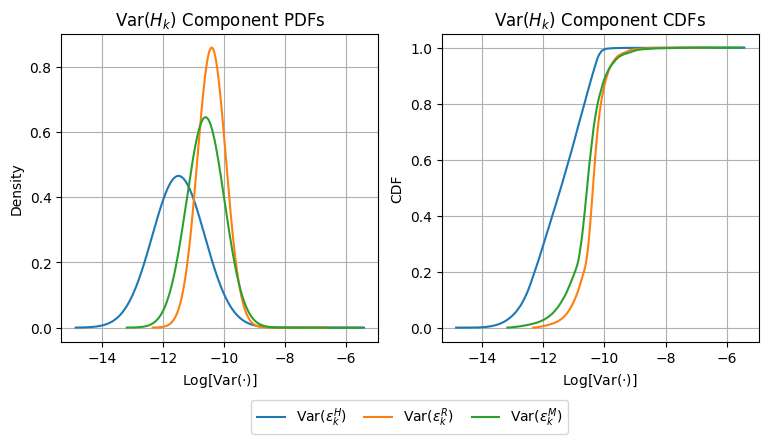

In [14]:
fig,ax = plt.subplots(1,2,figsize = (9,4))
X = np.log(var_eps_H)
Y = np.log(var_eps_R)
Z = np.log(var_eps_M)
# X = np.log(var_H)
source1 = {"Genotype": ["CV1"]*216501, "AGW1": X}
source2 = {"Genotype": ["CV1"]*216501, "AGW2": Y}
source3 = {"Genotype": ["CV1"]*216501, "AGW3": Z}
df1=pd.DataFrame(source1)
df1.sort_values(by=['AGW1'], inplace=True)
df_mean = np.mean(df1["AGW1"])
df_std = np.std(df1["AGW1"])
pdf1 = st.norm.pdf(df1["AGW1"], np.mean(df1["AGW1"]), np.std(df1["AGW1"]))


df2=pd.DataFrame(source2)
df2.sort_values(by=['AGW2'], inplace=True)
df_mean = np.mean(df2["AGW2"])
df_std = np.std(df2["AGW2"])
pdf2 = st.norm.pdf(df2["AGW2"], np.mean(df2["AGW2"]), np.std(df2["AGW2"]))

df3=pd.DataFrame(source3)
df3.sort_values(by=['AGW3'], inplace=True)
df_mean = np.mean(df3["AGW3"])
df_std = np.std(df3["AGW3"])
pdf3 = st.norm.pdf(df3["AGW3"], np.mean(df3["AGW3"]), np.std(df3["AGW3"]))



ax[0].plot(df1["AGW1"], pdf1,label = r'Var($\epsilon^H_k$)')
ax[0].plot(df2["AGW2"], pdf2,label = r'Var($\epsilon^R_k$)')
ax[0].plot(df3["AGW3"], pdf3,label = r'Var($\epsilon^M_k$)')
ax[0].set_xlabel('Log[Var($\cdot$)]')
# ax[0].legend()
ax[0].set_title('Var($H_k$) Component PDFs')
ax[0].set_ylabel('Density')
ax[0].grid()


data_1 = np.log(var_eps_H)
data_2 = np.log(var_eps_R)
data_3 = np.log(var_eps_M)

# ks_stat, p_value = stats.ks_2samp(data_1, data_2)
# print(ks_stat)
# data_2 = data['FMT'] * data['Area']
#sort data

cdf_data_1 = np.sort(data_1)
cdf_data_2 = np.sort(data_2)
cdf_data_3 = np.sort(data_3)


cdf1 = np.arange(len(data_1)) / float(len(data_1))
cdf2 = np.arange(len(data_2)) / float(len(data_2))
cdf3 = np.arange(len(data_3)) / float(len(data_3))


ax[1].plot(cdf_data_1, cdf1, label=r'Var($\epsilon^H_k$)')
ax[1].plot(cdf_data_2, cdf2, label=r'Var($\epsilon^R_k$)')
ax[1].plot(cdf_data_3, cdf3, label=r'Var($\epsilon^M_k$)')

# plt.title('CDF of Glacier Volume and Volume Uncertainty Ignoring Covariance')
ax[1].set_ylabel('CDF')
# ax[1].legend(loc = 'center right')
ax[1].set_title('Var($H_k$) Component CDFs')
ax[1].set_xlabel('Log[Var($\cdot$)]')

# plt.xscale('log')
ax[1].grid()
# plt.xlim([1e-10,1e-2])
# plt.yscale('sym')
plt.legend(bbox_to_anchor=(-0.601, -0.2999, 1, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=3)

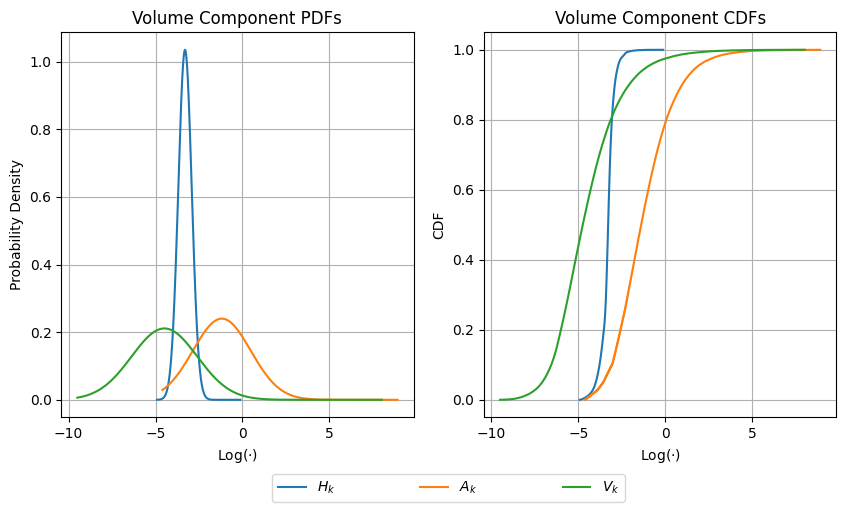

In [15]:
fig,ax = plt.subplots(1,2,figsize = (10,5))
X = np.log(E_H)
Y = np.log(E_A)
Z = np.log(E_H*E_A)
# X = np.log(var_H)
source1 = {"Genotype": ["CV1"]*216501, "AGW1": X}
source2 = {"Genotype": ["CV1"]*216501, "AGW2": Y}
source3 = {"Genotype": ["CV1"]*216501, "AGW3": Z}
df1=pd.DataFrame(source1)
df1.sort_values(by=['AGW1'], inplace=True)
df_mean = np.mean(df1["AGW1"])
df_std = np.std(df1["AGW1"])
pdf1 = st.norm.pdf(df1["AGW1"], np.mean(df1["AGW1"]), np.std(df1["AGW1"]))


df2=pd.DataFrame(source2)
df2.sort_values(by=['AGW2'], inplace=True)
df_mean = np.mean(df2["AGW2"])
df_std = np.std(df2["AGW2"])
pdf2 = st.norm.pdf(df2["AGW2"], np.mean(df2["AGW2"]), np.std(df2["AGW2"]))

df3=pd.DataFrame(source3)
df3.sort_values(by=['AGW3'], inplace=True)
df_mean = np.mean(df3["AGW3"])
df_std = np.std(df3["AGW3"])
pdf3 = st.norm.pdf(df3["AGW3"], np.mean(df3["AGW3"]), np.std(df3["AGW3"]))



ax[0].plot(df1["AGW1"], pdf1,label = r'Var($\epsilon^H_k$)')
ax[0].plot(df2["AGW2"], pdf2,label = r'Var($\epsilon^R_k$)')
ax[0].plot(df3["AGW3"], pdf3,label = r'Var($\epsilon^M_k$)')
ax[0].set_xlabel('Log($\cdot$)')
# ax[0].legend()
ax[0].set_title('Volume Component PDFs')
ax[0].set_ylabel('Probability Density')
ax[0].grid()


data_1 = np.log(E_H)
data_2 = np.log(E_A)
data_3 = np.log(E_H*E_A)

# ks_stat, p_value = stats.ks_2samp(data_1, data_2)
# print(ks_stat)
# data_2 = data['FMT'] * data['Area']
#sort data

cdf_data_1 = np.sort(data_1)
cdf_data_2 = np.sort(data_2)
cdf_data_3 = np.sort(data_3)


cdf1 = np.arange(len(data_1)) / float(len(data_1))
cdf2 = np.arange(len(data_2)) / float(len(data_2))
cdf3 = np.arange(len(data_3)) / float(len(data_3))


ax[1].plot(cdf_data_1, cdf1, label=r'$H_k$')
ax[1].plot(cdf_data_2, cdf2, label=r'$A_k$')
ax[1].plot(cdf_data_3, cdf3, label=r'$V_k$')

# plt.title('CDF of Glacier Volume and Volume Uncertainty Ignoring Covariance')
ax[1].set_ylabel('CDF')
# ax[1].legend(loc = 'center right')
ax[1].set_title('Volume Component CDFs')
ax[1].set_xlabel('Log($\cdot$)')

# plt.xscale('log')
ax[1].grid()
# plt.xlim([1e-10,1e-2])
# plt.yscale('sym')
plt.legend(bbox_to_anchor=(-0.601, -0.22, 1, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=3)

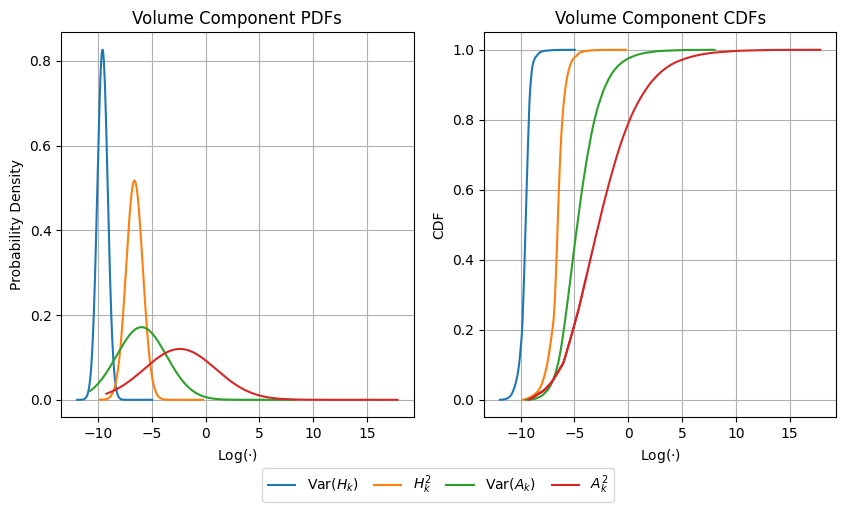

In [16]:
fig,ax = plt.subplots(1,2,figsize = (10,5))
A = np.log(var_H)
B = np.log(var_A)
C = np.log(E_A**2)
D = np.log(E_H**2)
# X = np.log(var_H)
source1 = {"Genotype": ["CV1"]*216501, "AGW1": A}
source2 = {"Genotype": ["CV1"]*216501, "AGW2": D}
source3 = {"Genotype": ["CV1"]*216501, "AGW3": B}
source4 = {"Genotype": ["CV1"]*216501, "AGW3": C}
df1=pd.DataFrame(source1)
df1.sort_values(by=['AGW1'], inplace=True)
df_mean = np.mean(df1["AGW1"])
df_std = np.std(df1["AGW1"])
pdf1 = st.norm.pdf(df1["AGW1"], np.mean(df1["AGW1"]), np.std(df1["AGW1"]))


df2=pd.DataFrame(source2)
df2.sort_values(by=['AGW2'], inplace=True)
df_mean = np.mean(df2["AGW2"])
df_std = np.std(df2["AGW2"])
pdf2 = st.norm.pdf(df2["AGW2"], np.mean(df2["AGW2"]), np.std(df2["AGW2"]))

df3=pd.DataFrame(source3)
df3.sort_values(by=['AGW3'], inplace=True)
df_mean = np.mean(df3["AGW3"])
df_std = np.std(df3["AGW3"])
pdf3 = st.norm.pdf(df3["AGW3"], np.mean(df3["AGW3"]), np.std(df3["AGW3"]))

df4=pd.DataFrame(source4)
df4.sort_values(by=['AGW3'], inplace=True)
df_mean = np.mean(df4["AGW3"])
df_std = np.std(df4["AGW3"])
pdf4 = st.norm.pdf(df4["AGW3"], np.mean(df4["AGW3"]), np.std(df4["AGW3"]))



ax[0].plot(df1["AGW1"], pdf1,label = r'Var($\epsilon^H_k$)')
ax[0].plot(df2["AGW2"], pdf2,label = r'Var($\epsilon^R_k$)')
ax[0].plot(df3["AGW3"], pdf3,label = r'Var($\epsilon^M_k$)')
ax[0].plot(df4["AGW3"], pdf4,label = r'Var($\epsilon^M_k$)')
ax[0].set_xlabel('Log($\cdot$)')
# ax[0].legend()
ax[0].set_title('Volume Component PDFs')
ax[0].set_ylabel('Probability Density')
ax[0].grid()

data_1 = A
data_2 = D
data_3 = B
data_4 = C


# ks_stat, p_value = stats.ks_2samp(data_1, data_2)
# print(ks_stat)
# data_2 = data['FMT'] * data['Area']
#sort data

cdf_data_1 = np.sort(data_1)
cdf_data_2 = np.sort(data_2)
cdf_data_4 = np.sort(data_4)
cdf_data_4 = np.sort(data_4)


cdf1 = np.arange(len(data_1)) / float(len(data_1))
cdf2 = np.arange(len(data_2)) / float(len(data_2))
cdf3 = np.arange(len(data_3)) / float(len(data_3))
cdf4 = np.arange(len(data_4)) / float(len(data_4))


ax[1].plot(cdf_data_1, cdf1, label=r'Var($H_k$)')
ax[1].plot(cdf_data_2, cdf2, label=r'$H_k^2$')
ax[1].plot(cdf_data_3, cdf3, label=r'Var($A_k$)')
ax[1].plot(cdf_data_4, cdf4, label=r'$A_k^2$')

# plt.title('CDF of Glacier Volume and Volume Uncertainty Ignoring Covariance')
ax[1].set_ylabel('CDF')
# ax[1].legend(loc = 'center right')
ax[1].set_title('Volume Component CDFs')
ax[1].set_xlabel('Log($\cdot$)')

# plt.xscale('log')
ax[1].grid()
# plt.xlim([1e-10,1e-2])
# plt.yscale('sym')
plt.legend(bbox_to_anchor=(-0.630, -0.22, 1, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=4)

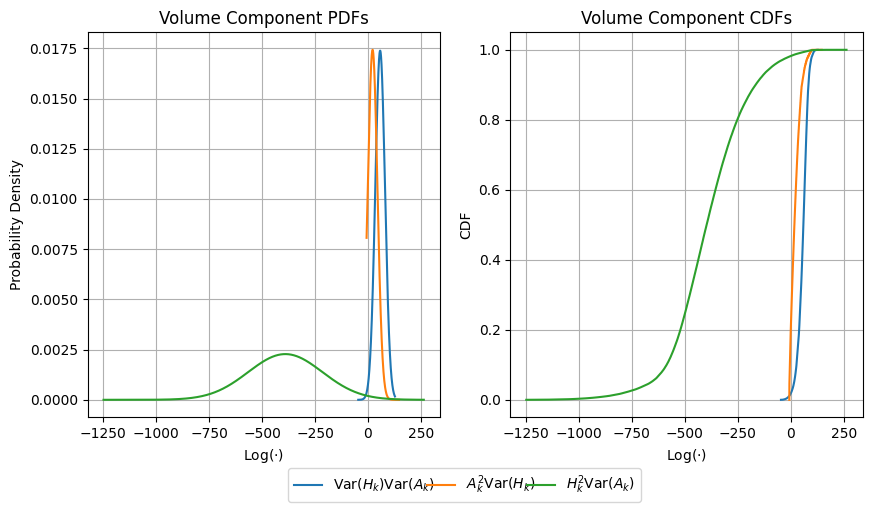

In [17]:
fig,ax = plt.subplots(1,2,figsize = (10,5))
A = np.log(var_H)
B = np.log(var_A)
C = np.log(E_A**2)
D = np.log(E_H**2)

A = A*B

B = C * B
C = A * D 
# X = np.log(var_H)
source1 = {"Genotype": ["CV1"]*216501, "AGW1": A}
source2 = {"Genotype": ["CV1"]*216501, "AGW2": B}
source3 = {"Genotype": ["CV1"]*216501, "AGW3": C}
# source4 = {"Genotype": ["CV1"]*216501, "AGW3": C}
df1=pd.DataFrame(source1)
df1.sort_values(by=['AGW1'], inplace=True)
df_mean = np.mean(df1["AGW1"])
df_std = np.std(df1["AGW1"])
pdf1 = st.norm.pdf(df1["AGW1"], np.mean(df1["AGW1"]), np.std(df1["AGW1"]))


df2=pd.DataFrame(source2)
df2.sort_values(by=['AGW2'], inplace=True)
df_mean = np.mean(df2["AGW2"])
df_std = np.std(df2["AGW2"])
pdf2 = st.norm.pdf(df2["AGW2"], np.mean(df2["AGW2"]), np.std(df2["AGW2"]))

df3=pd.DataFrame(source3)
df3.sort_values(by=['AGW3'], inplace=True)
df_mean = np.mean(df3["AGW3"])
df_std = np.std(df3["AGW3"])
pdf3 = st.norm.pdf(df3["AGW3"], np.mean(df3["AGW3"]), np.std(df3["AGW3"]))

# df4=pd.DataFrame(source4)
# df4.sort_values(by=['AGW3'], inplace=True)
# df_mean = np.mean(df4["AGW3"])
# df_std = np.std(df4["AGW3"])
# pdf4 = st.norm.pdf(df4["AGW3"], np.mean(df4["AGW3"]), np.std(df4["AGW3"]))



ax[0].plot(df1["AGW1"], pdf1,label = r'Var($\epsilon^H_k$)')
ax[0].plot(df2["AGW2"], pdf2,label = r'Var($\epsilon^R_k$)')
ax[0].plot(df3["AGW3"], pdf3,label = r'Var($\epsilon^M_k$)')
# ax[0].plot(df4["AGW3"], pdf4,label = r'Var($\epsilon^M_k$)')
ax[0].set_xlabel('Log($\cdot$)')
# ax[0].legend()
ax[0].set_title('Volume Component PDFs')
ax[0].set_ylabel('Probability Density')
ax[0].grid()

# data_1 = A
# data_2 = D
# data_3 = B
# data_4 = C

data_1 = A

data_2 = B
data_3 = C


# ks_stat, p_value = stats.ks_2samp(data_1, data_2)
# print(ks_stat)
# data_2 = data['FMT'] * data['Area']
#sort data

cdf_data_1 = np.sort(data_1)
cdf_data_2 = np.sort(data_2)
cdf_data_3 = np.sort(data_3)
# cdf_data_4 = np.sort(data_4)


cdf1 = np.arange(len(data_1)) / float(len(data_1))
cdf2 = np.arange(len(data_2)) / float(len(data_2))
cdf3 = np.arange(len(data_3)) / float(len(data_3))
# cdf4 = np.arange(len(data_4)) / float(len(data_4))


ax[1].plot(cdf_data_1, cdf1, label=r'Var($H_k$)Var($A_k$)')
ax[1].plot(cdf_data_2, cdf2, label=r'$A_k^2$Var($H_k$)')
ax[1].plot(cdf_data_3, cdf3, label=r'$H_k^2$Var($A_k$)')
# ax[1].plot(cdf_data_4, cdf4, label=r'$A_k^2$')

# plt.title('CDF of Glacier Volume and Volume Uncertainty Ignoring Covariance')
ax[1].set_ylabel('CDF')
# ax[1].legend(loc = 'center right')
ax[1].set_title('Volume Component CDFs')
ax[1].set_xlabel('Log($\cdot$)')

# plt.xscale('log')
ax[1].grid()
# plt.xlim([1e-10,1e-2])
# plt.yscale('sym')
plt.legend(bbox_to_anchor=(-0.630, -0.22, 1, 0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=3)

Text(0.5, 1.0, 'Global Glacier Volume Variance Components')

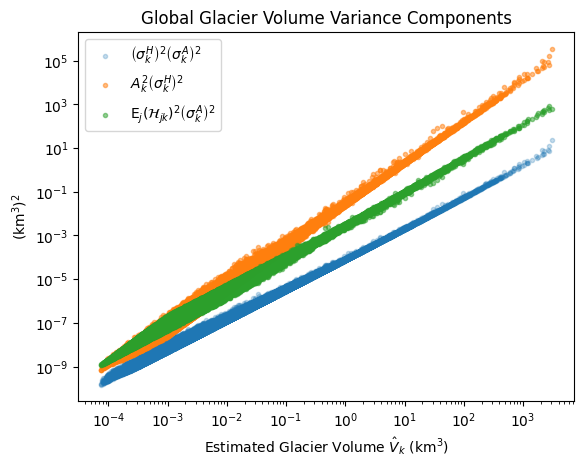

In [18]:
plt.scatter(E_H*E_A,v1,alpha = 0.25,
            label = r'$\left(\sigma^H_k\right)^2\left(\sigma^A_k\right)^2$',
            marker = '.'
           )
plt.scatter(
    E_H*E_A,v2,alpha = 0.5,
    label = r'$A_k^2\left(\sigma^{H}_k\right)^2$',
    marker = '.'
)
plt.scatter(
    E_H*E_A,v3,alpha = 0.5,
    label = r'E$_j\left(\mathcal{H}_{jk}\right)^2\left(\sigma^A_k\right)^2$',
    marker = '.'
)
# plt.scatter(
#     df['Area'],df['Area']*np.mean(df[cols]/1e3,axis = 1),marker = '.',alpha = 0.5,
#     label = 'h*A'
# )
# plt.scatter(df['Area'],np.sqrt(v1+v2+v3),alpha = 0.15,marker = '.',
#            label = r'$\sqrt{\sum}$')
plt.xlabel('Estimated Glacier Volume $\hat{V}_k$ (km$^3$)')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('(km$^3$)$^2$')
plt.legend()
plt.title('Global Glacier Volume Variance Components')


<Axes: ylabel='Contribution'>

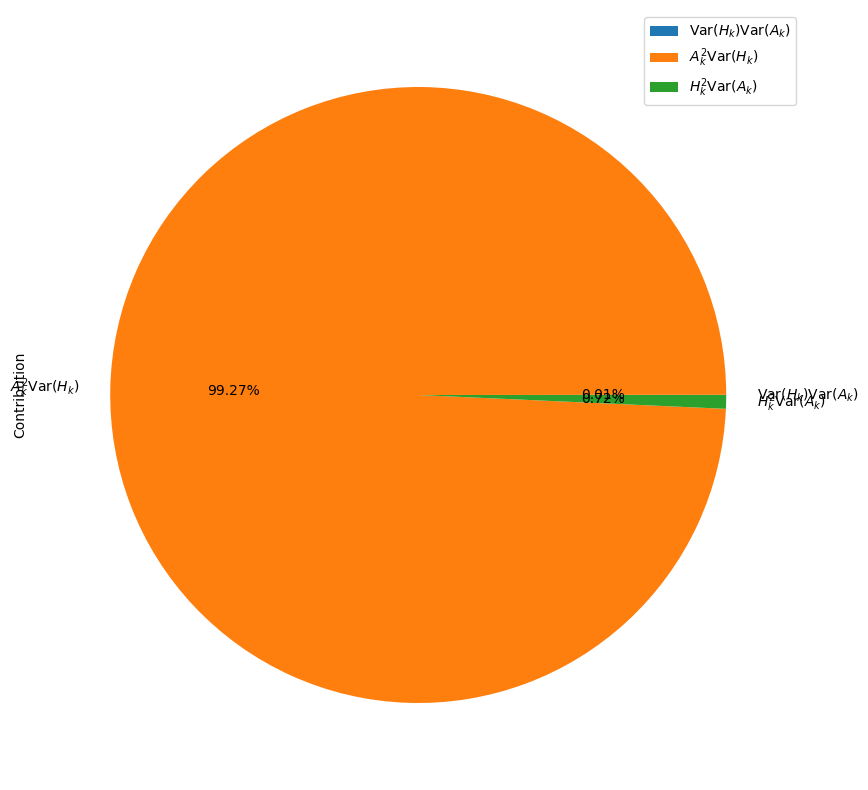

In [19]:
data = [[r'Var$\left(H_k\right)$Var$\left(A_k\right)$', np.sum(v1)], 
        [r'$A^2_k$Var$\left(H_k\right)$',np.sum(v2)], 
        [r'$H^2_k$Var$\left(A_k\right)$', np.sum(v3)]]
data = pd.DataFrame(data, columns=['Name', 'Contribution'],index = [
    r'Var$\left(H_k\right)$Var$\left(A_k\right)$',
    r'$A^2_k$Var$\left(H_k\right)$',
    r'$H^2_k$Var$\left(A_k\right)$'
])

data.plot.pie(y = 'Contribution',figsize=(13, 10),autopct='%0.2f%%')

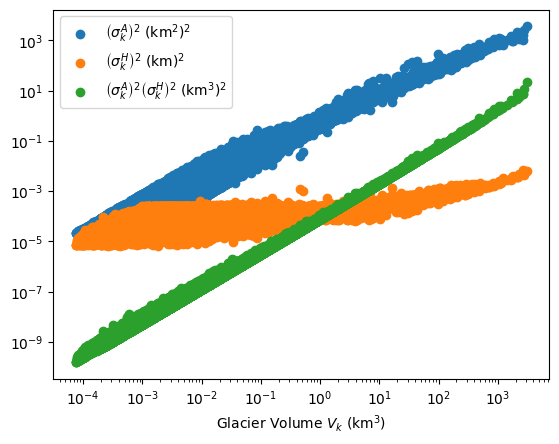

In [20]:

plt.scatter(E_H*E_A,var_A,label = r'$\left(\sigma^A_k\right)^2$ (km$^2$)$^2$')
plt.scatter(E_H*E_A,var_H,label = r'$\left(\sigma^H_k\right)^2$ (km)$^2$')
plt.scatter(E_H*E_A,(var_H*var_A),
            label = r'$\left(\sigma^A_k\right)^2\left(\sigma^H_k\right)^2$ (km$^3$)$^2$')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Glacier Volume $V_k$ (km$^3$)')
# plt.ylabel('(km$^3$)$^2$')
plt.legend()
plt.show()



<Axes: ylabel='Contribution'>

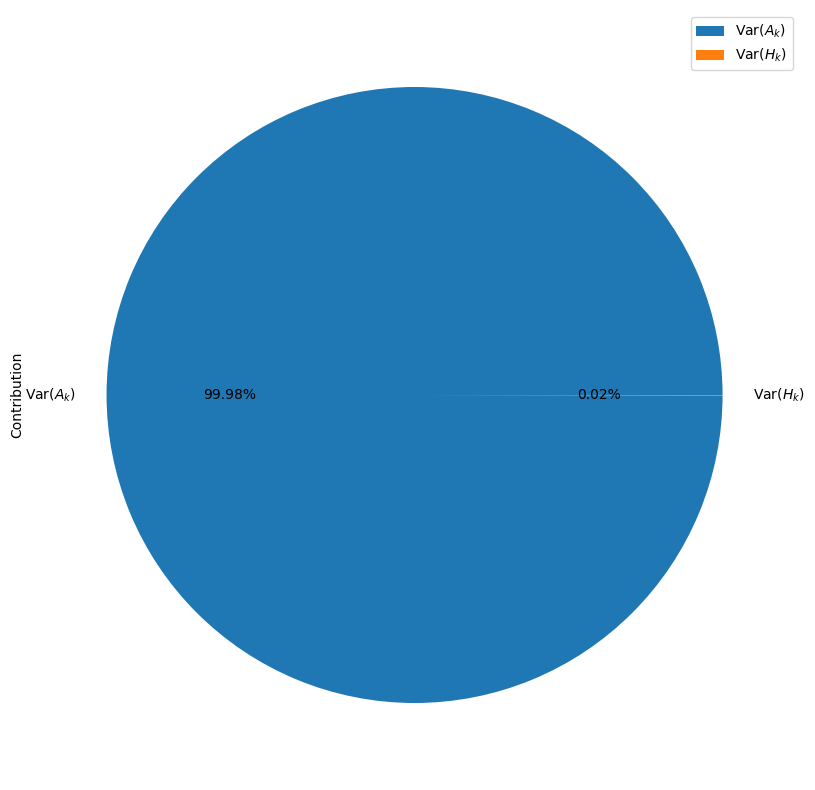

In [21]:
data = [[r'Var$\left(A_k\right)$', np.sum(var_A)], 
        [r'Var$\left(H_k\right)$',np.sum(var_H)], ]
data = pd.DataFrame(data, columns=['Name', 'Contribution'],index = [
    r'Var$\left(A_k\right)$',
    r'Var$\left(H_k\right)$',
#     r'Var$\left(\epsilon^M_k\right)$'
])

data.plot.pie(y = 'Contribution',figsize=(13, 10),autopct='%0.2f%%')

<Axes: ylabel='Contribution'>

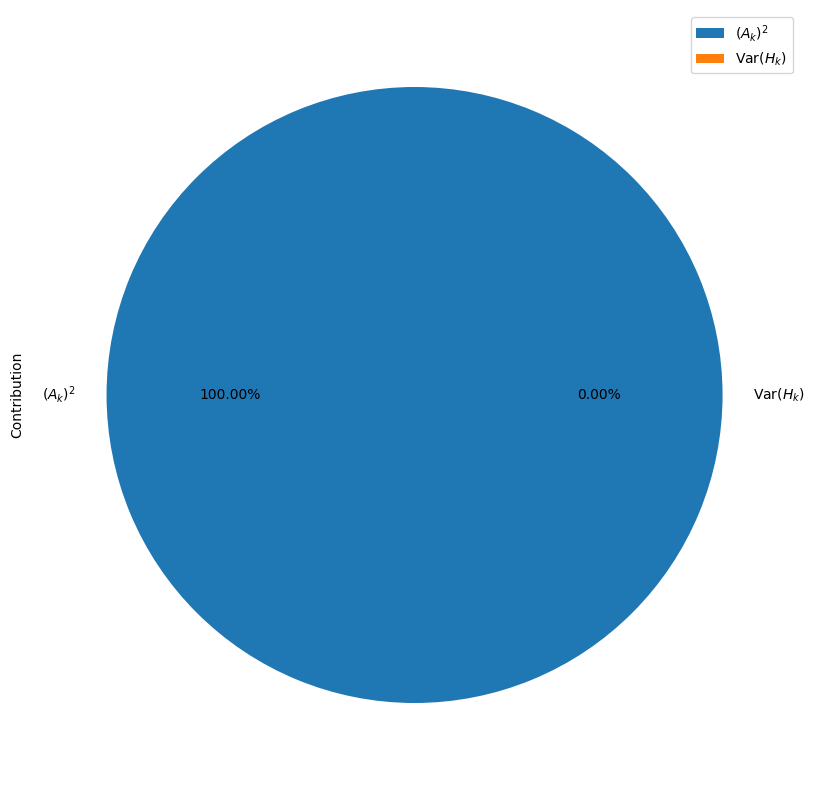

In [22]:
data = [[r'$\left(A_k\right)^2$', np.sum(E_A**2)], 
        [r'Var$\left(H_k\right)$',np.sum(var_H)], ]
data = pd.DataFrame(data, columns=['Name', 'Contribution'],index = [
    r'$\left(A_k\right)^2$',
    r'Var$\left(H_k\right)$',
#     r'Var$\left(\epsilon^M_k\right)$'
])

data.plot.pie(y = 'Contribution',figsize=(13, 10),autopct='%0.2f%%')

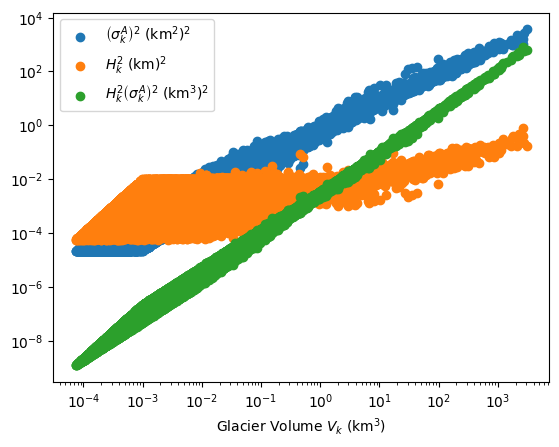

In [23]:
plt.scatter(E_H*E_A,var_A,label = r'$\left(\sigma^A_k\right)^2$ (km$^2$)$^2$')
plt.scatter(E_H*E_A,E_H**2,label = r'$H_k^2$ (km)$^2$')
plt.scatter(E_H*E_A,(E_H**2*var_A),
            label = r'$H_k^2\left(\sigma^A_k\right)^2$ (km$^3$)$^2$')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Glacier Volume $V_k$ (km$^3$)')
# plt.ylabel('(km$^3$)$^2$')
plt.legend()
plt.show()



<Axes: ylabel='Contribution'>

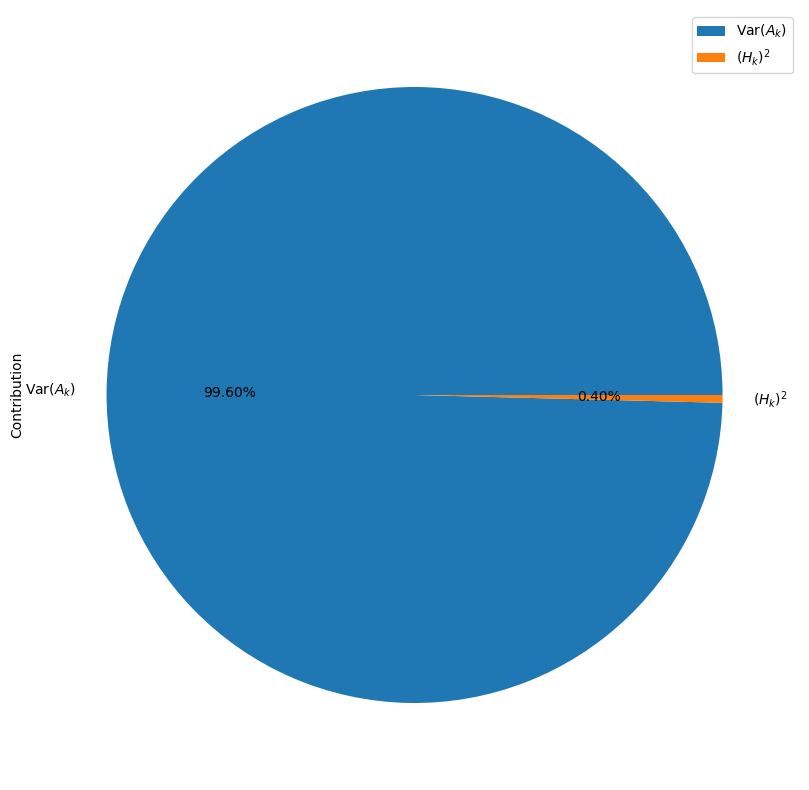

In [24]:
data = [[r'Var$\left(A_k\right)$', np.sum(var_A)], 
        [r'$\left(H_k\right)^2$',np.sum(E_H**2)], ]
data = pd.DataFrame(data, columns=['Name', 'Contribution'],index = [
    r'Var$\left(A_k\right)$',
    r'$\left(H_k\right)^2$',
#     r'Var$\left(\epsilon^M_k\right)$'
])

data.plot.pie(y = 'Contribution',figsize=(13, 10),autopct='%0.2f%%')